# Clustering with Spark - Data Exploration
In this exercise we deal with Apache Spark SQL which is the data wrangling tool of Spark and a bit similar to Pandas. As datasets we will use bills from a fictional supermarket.

To use Spark we need to **create a SparkSession**, which is the entry point to Spark SQL. Hence, **import** the class **SparkSession** from the module **pyspark.sql**. Afterwards, we create an object of that class called **spark** by using the builder of the SparkSession.

In [1]:
# Import SparkSession
from pyspark.sql import SparkSession

In [2]:
# Create spark object
spark = SparkSession.builder.getOrCreate()

We can create a DataFrame by using the **DataFrameReader read** of the **spark** object. Check out the DataFrameReader to see what kind of data we can load.  

**Hint**: You can inspect all attributes and methods of an object by using the built-in **dir(moduleName/Object)** function.

Our dataset has been saved in a semistructured json format. You can load the data by using the method **spark.read.json(pathToFile)**. Please load the data **bills-1000000.json** from the bills folder and call the dataframe bills.

In [3]:
# check the dataframe reader
[att for att in dir(spark.read) if '_' not in att]

['csv',
 'format',
 'jdbc',
 'json',
 'load',
 'option',
 'options',
 'orc',
 'parquet',
 'schema',
 'table',
 'text']

In [4]:
# Create DataFrame bills
bills = spark.read.json('kassenbons/bills-1000000.json')

In Pandas we have encountered the dataframe methods head, info and describe. The eqivalents of spark sql are **show**, **printSchema** and **describe**. Please, use the methods on the dataframe. Afterwards, answer the following questions:

1. How many columns does the dataframe hold?
2. What are the datatypes of the columns?

In [5]:
bills.show(5)

+---------------+--------------------+--------------------+---------+
|_corrupt_record|          customerId|            products|    total|
+---------------+--------------------+--------------------+---------+
|              [|                null|                null|     null|
|           null|372ae9ac-8665-467...|[[BACKWAREN, Knäc...|    35.09|
|           null|7bb78701-3ea4-475...|[[BACKWAREN, Butt...|17.979998|
|           null|6f724fdf-e143-46c...|[[BACKWAREN, Weiz...|71.450005|
|           null|4cc4642e-c7f5-4d8...|[[FISCH, Edle Mat...|    19.59|
+---------------+--------------------+--------------------+---------+
only showing top 5 rows



In [6]:
bills.printSchema()

root
 |-- _corrupt_record: string (nullable = true)
 |-- customerId: string (nullable = true)
 |-- products: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- category: string (nullable = true)
 |    |    |-- name: string (nullable = true)
 |    |    |-- price: double (nullable = true)
 |    |    |-- unit: string (nullable = true)
 |-- total: double (nullable = true)



In [7]:
bills.describe().show()

+-------+---------------+--------------------+------------------+
|summary|_corrupt_record|          customerId|             total|
+-------+---------------+--------------------+------------------+
|  count|              2|             1000000|           1000000|
|   mean|           null|                null|30.620862290786302|
| stddev|           null|                null|16.272093244287515|
|    min|              [|00011a5f-1378-4f6...|              2.87|
|    max|              ]|fffe64fa-b064-429...|         121.41999|
+-------+---------------+--------------------+------------------+



In contrast to Pandas, **Spark DataFrames are immutable objects**. You can perform transformations on a dataframe which will result into new dataframe and do not modify the original one. E.g. adding a new column yields a new dataframe.

You can select different columns by using the method select on a dataframe. Please, **select** the columns **customerId**, **products** and **total** of the bills DataFrame and call the resulting dataframe again **bills**. As the argument of the method you can either use a list our just comma separated column names. To check if the selection worked use the method **show**.

**Remark**: Every method which results into a new dataframe is called a transformation. Transformations in Spark are *lazy* and therefore are not really evaluated after the execution of a such a statement. All the transformations are only added to the directed acyclic execution graph. The computation is triggered when you apply an action, like show or count. Do you remember why this behaviour is useful? And what are the drawbacks?   

In [8]:
# select customerId, products and total
bills = bills.select(['customerId', 'products', 'total'])
bills.show()

+--------------------+--------------------+---------+
|          customerId|            products|    total|
+--------------------+--------------------+---------+
|                null|                null|     null|
|372ae9ac-8665-467...|[[BACKWAREN, Knäc...|    35.09|
|7bb78701-3ea4-475...|[[BACKWAREN, Butt...|17.979998|
|6f724fdf-e143-46c...|[[BACKWAREN, Weiz...|71.450005|
|4cc4642e-c7f5-4d8...|[[FISCH, Edle Mat...|    19.59|
|89e04680-d9de-452...|[[BACKWAREN, Scho...|     23.9|
|b8fc395d-ebf1-47b...|[[BACKWAREN, Keba...|    16.33|
|6db24614-cc12-4c2...|[[BACKWAREN, Knäc...|    42.65|
|c886ab20-4e05-4f1...|[[BACKWAREN, Ciab...|    37.07|
|1b1b45ce-e897-47e...|[[BACKWAREN, Kräu...|22.640001|
|c9123475-726f-4fd...|[[BACKWAREN, Tort...|    26.34|
|0adadaa5-dd3e-40c...|[[BACKWAREN, Hot-...|22.300003|
|589d54d9-07aa-4df...|[[BACKWAREN, Welt...|    16.05|
|6b8a5e09-1218-48a...|[[BACKWAREN, Apfe...|    48.31|
|ee665abd-009b-471...|[[BACKWAREN, Knäc...|    14.99|
|c792e341-f40f-40a...|[[BACK

Maybe  you have noticed that the first row contains only null values. Hence, we can drop that column by using the method **dropna()** on the dataframe. Call the resulting dataframe again **bills**. Always check the resulting dataframe by using the **show** method.

**Remark**: Similar to Pandas we could have used **chaining**, i.e. using several methods in one single statement.

In [9]:
# Drop null values
bills = bills.dropna()
bills.show()

+--------------------+--------------------+---------+
|          customerId|            products|    total|
+--------------------+--------------------+---------+
|372ae9ac-8665-467...|[[BACKWAREN, Knäc...|    35.09|
|7bb78701-3ea4-475...|[[BACKWAREN, Butt...|17.979998|
|6f724fdf-e143-46c...|[[BACKWAREN, Weiz...|71.450005|
|4cc4642e-c7f5-4d8...|[[FISCH, Edle Mat...|    19.59|
|89e04680-d9de-452...|[[BACKWAREN, Scho...|     23.9|
|b8fc395d-ebf1-47b...|[[BACKWAREN, Keba...|    16.33|
|6db24614-cc12-4c2...|[[BACKWAREN, Knäc...|    42.65|
|c886ab20-4e05-4f1...|[[BACKWAREN, Ciab...|    37.07|
|1b1b45ce-e897-47e...|[[BACKWAREN, Kräu...|22.640001|
|c9123475-726f-4fd...|[[BACKWAREN, Tort...|    26.34|
|0adadaa5-dd3e-40c...|[[BACKWAREN, Hot-...|22.300003|
|589d54d9-07aa-4df...|[[BACKWAREN, Welt...|    16.05|
|6b8a5e09-1218-48a...|[[BACKWAREN, Apfe...|    48.31|
|ee665abd-009b-471...|[[BACKWAREN, Knäc...|    14.99|
|c792e341-f40f-40a...|[[BACKWAREN, XXL ...|20.980001|
|dde8eebb-a488-40c...|[[BACK

Maybe you have noticed that the products column contains a nested array. To see the whole array you can select the **products** column by using the **select** method. Afterwards, apply the **show** method and set the arguments **n to 5** and **truncate to False**. One nested array contains all the groceries that one client has bought during a single shopping.

In [10]:
# Show complete products array
bills.select('products').show(n=5,truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

Next, we want to **add a new index column** called **shoppingId** which is made of a monotonically increasing integer number. Therefore, we use the function **monotonically_increasing_id** of the **funtion module of pyspark.sql**. Hence, **import** the **functions** module of pyspark.sql **as F**.

To add a column we can use the method **withColumn** on the Spark DataFrame. As the two arguments use **'shoppingId'** and **F.monotonicallyIndreasingId()**. Call the resulting dataframe **bills**. Finally, use the show method on the DataFrame to see if everything has worked properly.

In [11]:
# Import functions as F
from pyspark.sql import functions as F

In [12]:
# Add a new column shoppingId
bills = bills.withColumn('shoppingId', F.monotonically_increasing_id())
bills.show()

+--------------------+--------------------+---------+----------+
|          customerId|            products|    total|shoppingId|
+--------------------+--------------------+---------+----------+
|372ae9ac-8665-467...|[[BACKWAREN, Knäc...|    35.09|         0|
|7bb78701-3ea4-475...|[[BACKWAREN, Butt...|17.979998|         1|
|6f724fdf-e143-46c...|[[BACKWAREN, Weiz...|71.450005|         2|
|4cc4642e-c7f5-4d8...|[[FISCH, Edle Mat...|    19.59|         3|
|89e04680-d9de-452...|[[BACKWAREN, Scho...|     23.9|         4|
|b8fc395d-ebf1-47b...|[[BACKWAREN, Keba...|    16.33|         5|
|6db24614-cc12-4c2...|[[BACKWAREN, Knäc...|    42.65|         6|
|c886ab20-4e05-4f1...|[[BACKWAREN, Ciab...|    37.07|         7|
|1b1b45ce-e897-47e...|[[BACKWAREN, Kräu...|22.640001|         8|
|c9123475-726f-4fd...|[[BACKWAREN, Tort...|    26.34|         9|
|0adadaa5-dd3e-40c...|[[BACKWAREN, Hot-...|22.300003|        10|
|589d54d9-07aa-4df...|[[BACKWAREN, Welt...|    16.05|        11|
|6b8a5e09-1218-48a...|[[B

As in Pandas you can use a lot of different methods on a Spark DataFrame. For more functions check out the documentation:
<a href="http://spark.apache.org/docs/2.1.0/api/python/pyspark.sql.html#pyspark.sql.DataFrame">http://spark.apache.org/docs/2.1.0/api/python/pyspark.sql.html#pyspark.sql.DataFrame</a>. Usually you use these functions together with the method withColumn to add the result of the function to a dataframe.

In Spark you can also easily write your own functions, called UDFs. Let me demonstrate to you how you can construct a simple UDF:

In [14]:
# Read and execute the UDF Demo

from pyspark.sql.types import ArrayType, StringType
from pyspark.sql.functions import udf

# Create UDF
@udf(returnType=ArrayType(StringType()))
def split_string(my_string):
    return my_string.split('-')

# Above we have used a python decorator. It is similar like:
# Register as a udf
# split_string = F.udf(f=split_string,returnType=ArrayType(StringType()))

# Not a really useful udf, but maybe you got the point how easy it is :)
bills.withColumn('custom_udf', split_string('customerId')).show()

+--------------------+--------------------+---------+----------+--------------------+
|          customerId|            products|    total|shoppingId|          custom_udf|
+--------------------+--------------------+---------+----------+--------------------+
|372ae9ac-8665-467...|[[BACKWAREN, Knäc...|    35.09|         0|[372ae9ac, 8665, ...|
|7bb78701-3ea4-475...|[[BACKWAREN, Butt...|17.979998|         1|[7bb78701, 3ea4, ...|
|6f724fdf-e143-46c...|[[BACKWAREN, Weiz...|71.450005|         2|[6f724fdf, e143, ...|
|4cc4642e-c7f5-4d8...|[[FISCH, Edle Mat...|    19.59|         3|[4cc4642e, c7f5, ...|
|89e04680-d9de-452...|[[BACKWAREN, Scho...|     23.9|         4|[89e04680, d9de, ...|
|b8fc395d-ebf1-47b...|[[BACKWAREN, Keba...|    16.33|         5|[b8fc395d, ebf1, ...|
|6db24614-cc12-4c2...|[[BACKWAREN, Knäc...|    42.65|         6|[6db24614, cc12, ...|
|c886ab20-4e05-4f1...|[[BACKWAREN, Ciab...|    37.07|         7|[c886ab20, 4e05, ...|
|1b1b45ce-e897-47e...|[[BACKWAREN, Kräu...|22.640001| 

Please, use the **filter** and **count** methods to find out how many **shopping bags** were more expensive than 70 euros.

**Hint**: The method filter expects a condition and returns a dataframe. You can directly apply the count method via chaining. Use the *Shift + Tab* method to find out how you have to specify the condition.

In [16]:
# Filter and count
bills.filter(bills.total > 70).count()

20659

Next, we want to **create a histogram** of the column **total**. To create plots one usually transforms spark dataframes to **pandas dataframes** and uses the **matplotlib** or **seaborn** package. However, it is important to know that for a pandas dataframe the **whole data must fit into the memory of a single machine**. Therefore, it is common to aggregate the data with spark in order to transform less data to a pandas dataframe.

For this reason, we create bins of the column total by ourself. This can be achieved by using the **Bucketizer** class of the pyspark ML library. But first, please find out the **minimum** and **maximum** of the column **total**. Afterwards, use **numpy** to create an array of **evenly spaced numbers** over the min to max interval. The list should contain 10 elements.

**Hint**: Use the function linspace of numpy.

In [17]:
# summary statistics to get min and max of total
bills.select('total').describe().show()

+-------+------------------+
|summary|             total|
+-------+------------------+
|  count|           1000000|
|   mean|30.620862290786302|
| stddev|16.272093244287515|
|    min|              2.87|
|    max|         121.41999|
+-------+------------------+



In [18]:
# Create bin array
import numpy as np
bins = np.linspace(2,122,10)
bins

array([  2.        ,  15.33333333,  28.66666667,  42.        ,
        55.33333333,  68.66666667,  82.        ,  95.33333333,
       108.66666667, 122.        ])

Now, we import the Bucketizer class from the module pyspark.ml.feature.

In [19]:
# Import Bucketizer
from pyspark.ml.feature import Bucketizer

Please, create on object **bucketizer** of that class **Bucketizer** and use as splits the previously created bins array, as inputCol the column we want to bucketize and as the outputCol the string "total_buckets".

In [20]:
# Create bucketizer
bucketizer = Bucketizer(splits=bins, inputCol="total", outputCol="total_buckets")

This kind of object is very similar to sklearn preprocessing objects (e.g. the Standardizer). It has the method **transform** which expects a dataframe as the argument and returns a transformed dataframe. Please, use that method on the **bills** dataframe. Call the resulting dataframe **total_buck** and **show** the result.

In [21]:
# Use the transform method of the bucketizer
total_buck = bucketizer.transform(bills)
total_buck.show()

+--------------------+--------------------+---------+----------+-------------+
|          customerId|            products|    total|shoppingId|total_buckets|
+--------------------+--------------------+---------+----------+-------------+
|372ae9ac-8665-467...|[[BACKWAREN, Knäc...|    35.09|         0|          2.0|
|7bb78701-3ea4-475...|[[BACKWAREN, Butt...|17.979998|         1|          1.0|
|6f724fdf-e143-46c...|[[BACKWAREN, Weiz...|71.450005|         2|          5.0|
|4cc4642e-c7f5-4d8...|[[FISCH, Edle Mat...|    19.59|         3|          1.0|
|89e04680-d9de-452...|[[BACKWAREN, Scho...|     23.9|         4|          1.0|
|b8fc395d-ebf1-47b...|[[BACKWAREN, Keba...|    16.33|         5|          1.0|
|6db24614-cc12-4c2...|[[BACKWAREN, Knäc...|    42.65|         6|          3.0|
|c886ab20-4e05-4f1...|[[BACKWAREN, Ciab...|    37.07|         7|          2.0|
|1b1b45ce-e897-47e...|[[BACKWAREN, Kräu...|22.640001|         8|          1.0|
|c9123475-726f-4fd...|[[BACKWAREN, Tort...|    26.34

Now, we want to **count** the occurences of **shoppings** with respect to the **total_buckets**. Therefore, we can use the **groupBy** method on the total_buck dataframe. Afterwards, we can apply an aggregation which in this case here is **count**. Call the resulting dataframe **total_buck_counts**. As always, show the dataframe.

In [22]:
# Perform groupBy aggregation
total_buck_counts = total_buck.groupBy('total_buckets').count()
total_buck_counts.show()

+-------------+------+
|total_buckets| count|
+-------------+------+
|          8.0|     6|
|          0.0|120481|
|          7.0|   162|
|          1.0|487484|
|          4.0| 87990|
|          3.0|124777|
|          2.0|154190|
|          6.0|  2657|
|          5.0| 22253|
+-------------+------+



This dataframe is now much smaller than the bills dataframe. Hence, we can easily transform it to a pandas. Therefore, please use the method **toPandas()** on the total_buck_counts dataframe. Call the resulting dataframe **total_buck_counts_pandas**. How much memory does the pandas dataframe occupy?

In [23]:
# Create pandas dataframe
total_buck_counts_pandas = total_buck_counts.toPandas()

In [24]:
# show head of pandas df
total_buck_counts_pandas.head()

,total_buckets,count
0,8.0,6
1,0.0,120481
2,7.0,162
3,1.0,487484
4,4.0,87990


In [25]:
total_buck_counts_pandas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 2 columns):
total_buckets    9 non-null float64
count            9 non-null int64
dtypes: float64(1), int64(1)
memory usage: 224.0 bytes


Import **seaborn** as sns, issue the command **%matplotlib inline** and use the seaborn method **barplot** to plot the histogram. **Describe the histogram**.

In [26]:
# Import seaborn
import seaborn as sns
%matplotlib inline

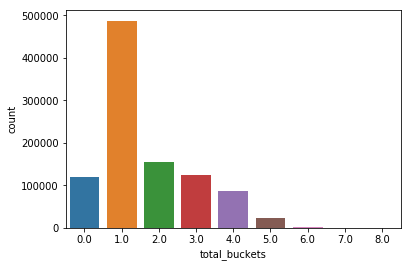

In [27]:
# Create barplot
sns.barplot(x='total_buckets', y='count', data=total_buck_counts_pandas)

There are also other ways to plot histograms in Spark. However, they all have in common that you need all the data on a single machine.

**Remark**: Do never collect the whole dataframe to the driver, i.e. to a single JVM on a single machine. Always aggregate the data first. In Big Data the data is usually just too big to fit into the memory of one machine.

Next, we want to **explode** the **products** array of the bills dataframe. This means that each element of the array will lead to a new row in the dataframe. Therefore, pyspark provides a function called explode which is part of the functions module which we have already imported.

Please use the method **withColumn** on the dataframe bills. As the argument use **'products'** and the explode function of the functions module which we have imported as F. To the explode function please pass the **products column**.
Call the resulting dataframe **bills_exploded** and use the show method to see if the transformation has worked as expected.

In [28]:
# Explode the column products of the bills dataframe
# bills_exploded = bills.withColumn('products', F.explode(bills['products']))
bills_exploded = bills.withColumn('products', F.explode('products'))
bills_exploded.show()
#.select("products.*","shoppingId","customerId").show()

+--------------------+--------------------+-----+----------+
|          customerId|            products|total|shoppingId|
+--------------------+--------------------+-----+----------+
|372ae9ac-8665-467...|[BACKWAREN, Knäck...|35.09|         0|
|372ae9ac-8665-467...|[BACKWAREN, Apfel...|35.09|         0|
|372ae9ac-8665-467...|[BROTAUFSTRICH_CE...|35.09|         0|
|372ae9ac-8665-467...|[DROGERIEARTIKEL,...|35.09|         0|
|372ae9ac-8665-467...|[DROGERIEARTIKEL,...|35.09|         0|
|372ae9ac-8665-467...|[FERTIGPRODUKT, S...|35.09|         0|
|372ae9ac-8665-467...|[FERTIGPRODUKT, M...|35.09|         0|
|372ae9ac-8665-467...|[FETTE, Natives O...|35.09|         0|
|372ae9ac-8665-467...|[FETTE, Natives O...|35.09|         0|
|372ae9ac-8665-467...|[FLEISCH_WURST, K...|35.09|         0|
|372ae9ac-8665-467...|[GETRAENKE, Miner...|35.09|         0|
|372ae9ac-8665-467...|[GETRAENKE, Apfel...|35.09|         0|
|372ae9ac-8665-467...|[KAESE, Frischkäs...|35.09|         0|
|372ae9ac-8665-467...|[K

Checkout out the schema of the dataframe by using the printSchema method.

In [29]:
# print Schema
bills_exploded.printSchema()

root
 |-- customerId: string (nullable = true)
 |-- products: struct (nullable = true)
 |    |-- category: string (nullable = true)
 |    |-- name: string (nullable = true)
 |    |-- price: double (nullable = true)
 |    |-- unit: string (nullable = true)
 |-- total: double (nullable = true)
 |-- shoppingId: long (nullable = false)



To select elements of an *struct* (named array) datatype you can use dot notation, e.g. products.name. Please try to select only the price column of the dataframe bills_exploded.

In [30]:
# Select element of a struct datatype
bills_exploded.select('products.price').show()

+-----+
|price|
+-----+
| 2.55|
| 2.59|
| 1.89|
| 0.89|
| 1.49|
| 2.49|
| 1.99|
| 3.79|
| 3.79|
|  1.2|
| 2.34|
| 0.55|
| 0.75|
| 1.89|
| 1.79|
| 1.49|
| 1.39|
| 0.44|
| 1.19|
| 0.59|
+-----+
only showing top 20 rows



We want to extract all the elements inside the products column. This can be done by using the **asterik symbol \***. Please, select **shoppingId**, **customerId**, **total** and all attributes of **products**. Afterwards, **drop** the column **unit** by using the method **drop()**. Call the resulting dataframe **bills_exploded**.

In [31]:
# Extract elements of the struct column products
bills_exploded = bills_exploded.select("products.*","shoppingId","customerId", 'total').drop('unit')
bills_exploded.show()

+--------------------+--------------------+-----+----------+--------------------+-----+
|            category|                name|price|shoppingId|          customerId|total|
+--------------------+--------------------+-----+----------+--------------------+-----+
|           BACKWAREN|Knäckebrot Dinkel...| 2.55|         0|372ae9ac-8665-467...|35.09|
|           BACKWAREN|Apfel Streuselkuchen| 2.59|         0|372ae9ac-8665-467...|35.09|
|BROTAUFSTRICH_CER...|Fruchtaufstrich S...| 1.89|         0|372ae9ac-8665-467...|35.09|
|     DROGERIEARTIKEL|      Kosmetiktücher| 0.89|         0|372ae9ac-8665-467...|35.09|
|     DROGERIEARTIKEL|Deospray for Men ...| 1.49|         0|372ae9ac-8665-467...|35.09|
|       FERTIGPRODUKT|   Schlemmer Spätzle| 2.49|         0|372ae9ac-8665-467...|35.09|
|       FERTIGPRODUKT|         Maultaschen| 1.99|         0|372ae9ac-8665-467...|35.09|
|               FETTE|Natives Olivenöl ...| 3.79|         0|372ae9ac-8665-467...|35.09|
|               FETTE|Natives Ol

In contrast to Pandas we can use **standard SQL statements** on our dataframe. Therefore, we need to **register** our dataframe as a **temporary table**. Use the method registerTempTable on the bills_exploded dataframe and use the string 'bills_exploded' as the name of the registered table.

In [32]:
# register table
bills_exploded.registerTempTable('bills_exploded')

Now you can use sql statements by using the sql method of the spark object. An example is shown here:

In [33]:
spark.sql("select * from bills_exploded").show()

+--------------------+--------------------+-----+----------+--------------------+-----+
|            category|                name|price|shoppingId|          customerId|total|
+--------------------+--------------------+-----+----------+--------------------+-----+
|           BACKWAREN|Knäckebrot Dinkel...| 2.55|         0|372ae9ac-8665-467...|35.09|
|           BACKWAREN|Apfel Streuselkuchen| 2.59|         0|372ae9ac-8665-467...|35.09|
|BROTAUFSTRICH_CER...|Fruchtaufstrich S...| 1.89|         0|372ae9ac-8665-467...|35.09|
|     DROGERIEARTIKEL|      Kosmetiktücher| 0.89|         0|372ae9ac-8665-467...|35.09|
|     DROGERIEARTIKEL|Deospray for Men ...| 1.49|         0|372ae9ac-8665-467...|35.09|
|       FERTIGPRODUKT|   Schlemmer Spätzle| 2.49|         0|372ae9ac-8665-467...|35.09|
|       FERTIGPRODUKT|         Maultaschen| 1.99|         0|372ae9ac-8665-467...|35.09|
|               FETTE|Natives Olivenöl ...| 3.79|         0|372ae9ac-8665-467...|35.09|
|               FETTE|Natives Ol

Use the registered table or the domain spefic spark sql syntax to answer the following questions:

**1. How many products have been sold?**  
**2. How many different products have been sold?**  
**3. Products of which category have been sold the most**  
**4. Which product has lead to the most total revenue?**  
**5. Which product is the cheapest and which is the most expensive one?**

Measure the execution time of the first and second statement. It is not that lightning fast, right? The reason is that the dataframe has not been cached. Please cache the dataframe by using the **cache()**. Call the result **bills_exploded_cached**. Afterwards, register again a temp table and answer all the questions. Do you notice a difference in speed for the second questions? Why do we not gain any speed boost for the first question?

In [34]:
%%time
# 1.
bills_exploded.count()

CPU times: user 1.11 ms, sys: 355 µs, total: 1.46 ms
Wall time: 6.12 s


18966517

In [35]:
%%time
# 2.
bills_exploded.select('name').distinct().count()

CPU times: user 2.41 ms, sys: 30 µs, total: 2.44 ms
Wall time: 6.95 s


995

In [36]:
# Cache dataframe
bills_exploded_cached = bills_exploded.cache()

In [37]:
%%time
# 1.
bills_exploded_cached.count()

CPU times: user 1.69 ms, sys: 544 µs, total: 2.24 ms
Wall time: 15 s


18966517

In [38]:
%%time
# 2.
bills_exploded_cached.select('name').distinct().count()

CPU times: user 1.78 ms, sys: 574 µs, total: 2.35 ms
Wall time: 1.78 s


995

In [39]:
# 3.
bills_exploded_cached.select('category', 'name').groupBy('category').count().sort(F.desc("count")).show()

+--------------------+-------+
|            category|  count|
+--------------------+-------+
|        OBST_GEMUESE|2704403|
|           GETRAENKE|2517666|
|           BACKWAREN|2051616|
|              NUDELN|1767177|
|            MOLKE_EI|1745736|
|       FLEISCH_WURST|1665581|
|               KAESE|1324865|
|       FERTIGPRODUKT|1097541|
|     DROGERIEARTIKEL| 876906|
|               FISCH| 826238|
|BROTAUFSTRICH_CER...| 754423|
|          KAFFEE_TEE| 716296|
|               FETTE| 486624|
|GEWUERZE_BACKZUTATEN| 431445|
+--------------------+-------+



In [40]:
# 4. 
bills_exploded_cached.groupBy('name').agg(F.sum('price').alias('total_rev')).sort(F.desc("total_rev")).show()

+--------------------+------------------+
|                name|         total_rev|
+--------------------+------------------+
|Natives Olivenöl ...|   307191.06000001|
|           Spaghetti| 277580.8900000017|
|            Hähnchen|250483.09999999814|
|Natives Olivenöl BIO|222464.17999999854|
|           Entrecote|217166.28000000355|
|         Hackfleisch|217085.58000000083|
|             Tilapia|187294.65999999302|
|       Minutensteaks|181030.55000000363|
|           Schnitzel|180409.15000000363|
|           Himbeeren|174498.09000000462|
|            Gulasch |172585.85000000324|
|Rindergulasch aus...|166845.15000000305|
|Ciabatta Brötchen...| 163199.0200000193|
|   Orangendirektsaft|159094.24000000695|
|Garnelen, Black T...|151177.10999999323|
|Black Tiger Garnelen|149361.65999999334|
|Kaffee Peru Yanesha |148161.68999999735|
|Alaska Seelachsfi...| 148076.8799999934|
|        Räucherlachs|  146330.129999997|
|       Schweinefilet| 144780.2300000017|
+--------------------+------------

In [41]:
# 5. 
bills_exploded_cached.groupBy().agg(F.min('price'), F.max('price')).show()

+----------+----------+
|min(price)|max(price)|
+----------+----------+
|      0.11|     16.66|
+----------+----------+



In [42]:
#5.
bills_exploded_cached.select('name', 'price').distinct().filter('price <= 0.11 or price >=16.66').show(truncate=False)

+-----------------------------+-----+
|name                         |price|
+-----------------------------+-----+
|Mineralwasser mit Kohlensäure|0.11 |
|Hähnchen                     |16.66|
+-----------------------------+-----+



For the next exercise we need the exploded dataframe. Hence, save the dataframe by using the method write.parquet method. As the argument use 'bills_exploded.parquet'.

In [43]:
# save df
bills_exploded_cached.write.mode('overwrite').parquet('bills_exploded.parquet')

In [44]:
# read the df
spark.read.parquet('bills_exploded.parquet').show()

+--------------------+--------------------+-----+-----------+--------------------+-----+
|            category|                name|price| shoppingId|          customerId|total|
+--------------------+--------------------+-----+-----------+--------------------+-----+
|           BACKWAREN|Ciabatta Brötchen...| 3.79|51539607552|7c1e2cc7-8e60-4fe...|58.56|
|           BACKWAREN|XXL Hamburger Brö...| 1.19|51539607552|7c1e2cc7-8e60-4fe...|58.56|
|           BACKWAREN|Tortilla Wraps We...| 1.55|51539607552|7c1e2cc7-8e60-4fe...|58.56|
|           BACKWAREN|Weizenvollkornsan...| 1.45|51539607552|7c1e2cc7-8e60-4fe...|58.56|
|           BACKWAREN|  Roggenvollkornbrot| 0.79|51539607552|7c1e2cc7-8e60-4fe...|58.56|
|           BACKWAREN|          Käsekuchen| 2.19|51539607552|7c1e2cc7-8e60-4fe...|58.56|
|BROTAUFSTRICH_CER...|        Schoko Müsli| 2.15|51539607552|7c1e2cc7-8e60-4fe...|58.56|
|     DROGERIEARTIKEL|    Butterbrotpapier| 1.15|51539607552|7c1e2cc7-8e60-4fe...|58.56|
|       FERTIGPRODUKT

**This is the end of this exercise.**

Of course there are many more functions, like joins, etc. We will encounter some of them in the next exercise.